In [81]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [82]:
X = np.random.default_rng(seed=50)
X = X.random((500,4))
X

array([[0.78742269, 0.83366933, 0.54790446, 0.9734491 ],
       [0.23683356, 0.64692334, 0.06502607, 0.55557761],
       [0.40235748, 0.2659658 , 0.9866823 , 0.39731767],
       ...,
       [0.17768479, 0.73633661, 0.0480366 , 0.54396791],
       [0.65696821, 0.89312075, 0.69183302, 0.16719647],
       [0.20413094, 0.63928615, 0.24123946, 0.80956772]])

In [83]:
y = np.zeros((500,), dtype=np.uint32)
y[:100] = int(0)
y[100:200] = int(1)
y[200:300] = int(2)
y[300:400] = int(3)
y[400:] = int(4)
np.random.shuffle(y)
y

array([1, 3, 4, 4, 4, 1, 3, 0, 3, 3, 2, 0, 2, 2, 4, 1, 2, 2, 3, 0, 1, 3,
       1, 1, 0, 3, 1, 4, 3, 3, 4, 0, 2, 2, 3, 2, 3, 1, 2, 4, 0, 3, 2, 4,
       3, 1, 1, 3, 1, 2, 1, 4, 4, 1, 0, 3, 4, 2, 3, 0, 1, 2, 1, 2, 3, 2,
       3, 0, 2, 1, 3, 1, 1, 4, 1, 3, 2, 4, 0, 4, 3, 2, 0, 2, 2, 1, 3, 0,
       3, 0, 2, 3, 0, 0, 1, 0, 3, 2, 0, 2, 1, 2, 1, 3, 3, 1, 1, 3, 4, 4,
       4, 1, 0, 2, 1, 4, 4, 4, 2, 1, 3, 0, 0, 0, 3, 3, 4, 3, 2, 1, 2, 2,
       4, 3, 2, 2, 2, 0, 1, 4, 4, 2, 0, 2, 4, 1, 3, 3, 4, 3, 4, 3, 2, 2,
       4, 3, 4, 0, 1, 1, 3, 4, 2, 4, 1, 1, 2, 3, 1, 4, 1, 1, 1, 4, 0, 3,
       2, 2, 4, 4, 3, 3, 1, 1, 4, 4, 1, 3, 3, 2, 1, 0, 3, 4, 0, 2, 0, 3,
       2, 3, 2, 1, 4, 0, 1, 2, 1, 3, 2, 1, 2, 4, 2, 0, 3, 0, 3, 1, 0, 2,
       3, 2, 1, 3, 1, 3, 4, 0, 2, 0, 4, 1, 1, 2, 2, 0, 2, 4, 4, 3, 0, 1,
       2, 0, 2, 0, 4, 2, 0, 0, 4, 0, 3, 2, 4, 0, 3, 4, 2, 3, 0, 4, 4, 4,
       4, 3, 3, 0, 4, 4, 2, 3, 1, 0, 4, 0, 4, 4, 4, 3, 3, 0, 1, 0, 4, 1,
       2, 4, 4, 2, 4, 1, 2, 0, 2, 1, 0, 1, 1, 3, 0,

In [84]:
df = pd.DataFrame(X, columns=['f1','f2','f3','f4'])
df['label'] = y
df

,f1,f2,f3,f4,label
0,0.787423,0.833669,0.547904,0.973449,1
1,0.236834,0.646923,0.065026,0.555578,3
2,0.402357,0.265966,0.986682,0.397318,4
3,0.328456,0.125157,0.111458,0.984573,4
4,0.578940,0.892093,0.015080,0.599699,4
...,...,...,...,...,...
495,0.575448,0.767862,0.798171,0.904880,0
496,0.150299,0.339298,0.146237,0.316647,2
497,0.177685,0.736337,0.048037,0.543968,1
498,0.656968,0.893121,0.691833,0.167196,4


/tmp/ipykernel_7840/4203795705.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], y=y,cmap=cmap, edgecolor='k', s=20)
/tmp/ipykernel_7840/4203795705.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,1], y=y,cmap=cmap, edgecolor='g', s=20)


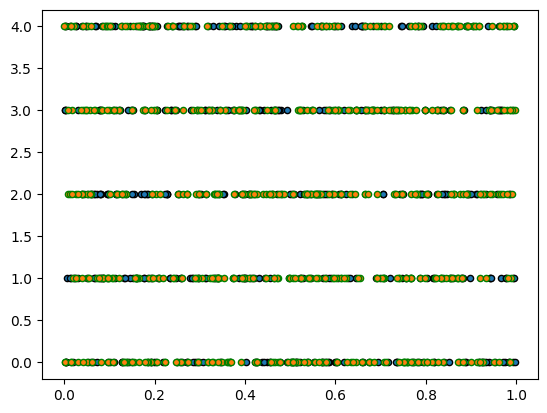

In [85]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF','#FF0001','#FF0002'])
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,0], y=y,cmap=cmap, edgecolor='k', s=20)
plt.scatter(X[:,1], y=y,cmap=cmap, edgecolor='g', s=20)
# plt.scatter(X[:,2], y=y,cmap=cmap, edgecolor='r', s=20)
# plt.scatter(X[:,3], y=y,cmap=cmap, edgecolor='k', s=20)
plt.show()

In [86]:
#from our KNN.py file
from KNN import KNN
scc_list = []
for k in range (1,21) :
    clf = KNN(k=k)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    # print(predictions)
    acc = np.sum(predictions == y_test) / len(y_test)
    scc_list.append(acc)
    # print(acc)


20

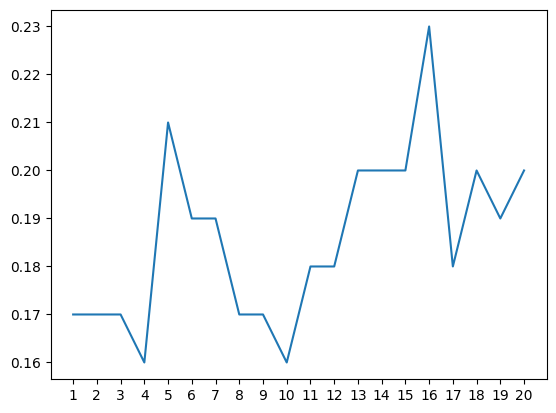

In [87]:
plt.plot([i for i in range (1, 21)], scc_list)
plt.xticks(range(1,21))
len(scc_list)

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=5)

In [89]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
knn_1.score(X_test, y_test)

0.2

In [91]:
from sklearn.metrics import confusion_matrix
y_pred = knn_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  3,  6,  3,  2],
       [ 9,  4,  1,  1,  1],
       [ 6,  5,  4,  4,  3],
       [12,  5,  3,  4,  3],
       [ 3,  4,  3,  3,  2]])

Text(58.222222222222214, 0.5, 'Truth')

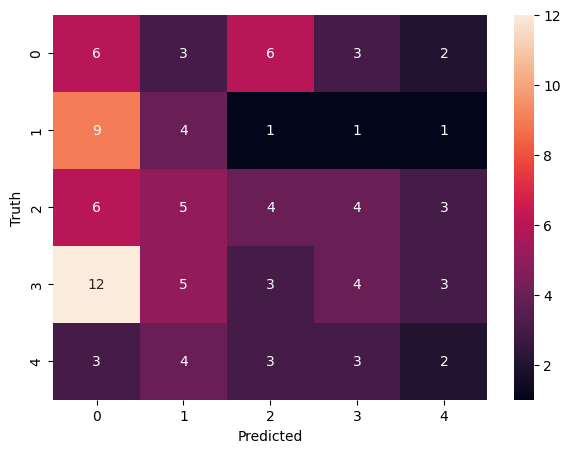

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import json
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.30      0.21        20
           1       0.19      0.25      0.22        16
           2       0.24      0.18      0.21        22
           3       0.27      0.15      0.19        27
           4       0.18      0.13      0.15        15

    accuracy                           0.20       100
   macro avg       0.21      0.20      0.20       100
weighted avg       0.21      0.20      0.20       100



In [94]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=4,
    n_informative=4, n_redundant=0, n_repeated=0, n_classes=3, 
    n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=5.0, hypercube=True, shift=0.0, scale=1.0, 
    shuffle=True, random_state=None)

In [95]:
X

array([[ 3.99322312,  4.81179897, -3.69819888, -4.86093637],
       [-6.07832178, -4.09527931,  7.24733777, -5.96579234],
       [-5.80453273,  4.61536618,  4.15001428, -4.9006648 ],
       ...,
       [-3.41072911, -6.19162719,  1.62185336, -3.55918806],
       [-7.19281465, -4.12755936,  8.01397131, -7.0078479 ],
       [-4.87334125, -4.89369042,  5.9370248 , -4.89062429]])

In [96]:
y

array([0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 2,
       2, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 2, 2, 2, 0, 1, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 2,
       1, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 2,
       1, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0,
       1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       1, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 0, 0, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1,

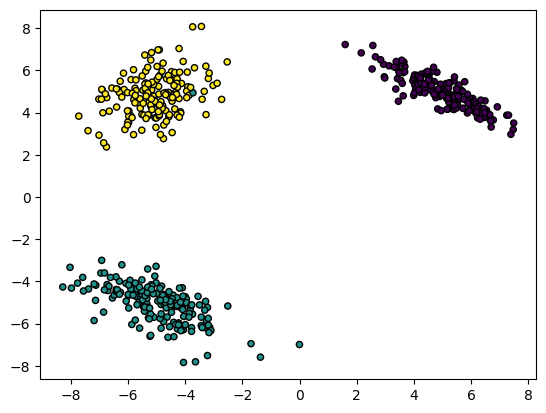

In [97]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

plt.figure()
plt.scatter(X[:,0],X[:,1], c=y, edgecolor='k', s=20)
plt.show()



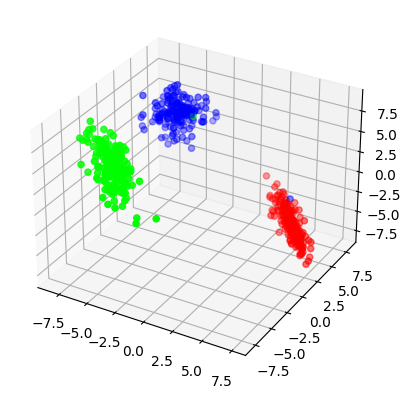

In [98]:
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0],X[:,1],X[:,2], c=y,cmap=cmap);


In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn_1 = KNeighborsClassifier(n_neighbors=5)

In [100]:
knn_1.fit(X_train, y_train)

KNeighborsClassifier()

In [101]:
from sklearn.metrics import confusion_matrix
y_pred = knn_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[32,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 31]])

Text(58.222222222222214, 0.5, 'Truth')

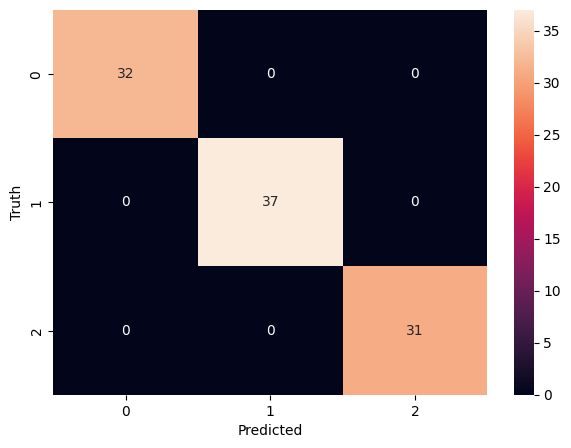

In [102]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        31

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [104]:
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
    # print(predictions)
acc = np.sum(predictions == y_test) / len(y_test)
# scc_list.append(acc)
acc

1.0